In [1]:
import caffe
import lmdb
import glob
import skimage
from skimage import io
import numpy
from skimage.transform import resize
import numpy as np
from caffe import layers as L
from caffe import params as P
from pylab import *
import pandas as pd
%matplotlib inline

In [15]:
# from caffe import layers as L
# from caffe import params as P

def foodCNN(lmdb, batch_size):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    n = caffe.NetSpec()
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=dict(scale=1./255), ntop=2)
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.pool2 = L.Pooling(n.conv2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
#     n.ip1 = L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.conv3 = L.Convolution(n.pool2, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.pool3 = L.Pooling(n.conv3, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.ip1 = L.InnerProduct(n.pool3, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.ip1)
    n.ip2 = L.InnerProduct(n.relu1, num_output=2, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.ip2, n.label)
    n.prob = L.Softmax(n.ip2)

    return n.to_proto()

#     n = caffe.NetSpec()
#     n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
#                              transform_param=dict(scale=1./255), ntop=2)
#     n.conv1 = L.Convolution(n.data, kernel_size=11, num_output=96, stride=4, 
#                             weight_filler=dict(type='gaussian', std=0.01),
#                             bias_filler=dict(type='constant', value=0),
#                             param=learned_param)
#     n.relu1 = L.Relu(n.conv1)                         
#     n.pool1 = L.Pooling(n.relu1, kernel_size=3, stride=2, pool=P.Pooling.MAX)
#     n.norm1 = L.LRN(n.pool1, local_size=5, alpha=0.001, beta=0.75, knorm = 1)
#     n.conv2 = L.Convolution(n.norm1, kernel_size=5, num_output=256, pad=2, group=2,
#                             weight_filler=dict(type='gaussian', std=0.01), 
#                             bias_filler=dict(type='constant', value=1))
#     n.relu2 = L.Relu(n.conv2)
#     n.pool2 = L.Pooling(n.relu2, kernel_size=3, stride=2, pool=P.Pooling.MAX)
#     n.norm2 = L.LRN(n.pool2, local_size=5, alpha=0.001, beta=0.75, knorm =1)       
#     n.conv3 = L.Convolution(n.norm2, kernel_size=3, num_output=384, pad=1,
#                             weight_filler=dict(type='gaussian', std=0.01),
#                             bias_filler=dict(type='constant', value=0)) 
#     n.relu3 = L.Relu(n.conv3)
#     n.conv4 = L.Convolution(n.relu3, kernel_size=3, num_output=384, pad=1, group=2,
#                             weight_filler=dict(type='gaussian', std=0.01),
#                             bias_filler=dict(type='constant', value=1)) 
#     n.relu4 = L.Relu(n.conv4)
#     n.conv5 = L.Convolution(n.relu4, kernel_size=3, num_output=256, pad=1, 
#                             weight_filler=dict(type='gaussian', std=0.01),
#                             bias_filler=dict(type='constant', value=1))
#     n.relu5 = L.Relu(n.conv5)
#     n.pool5 = L.Pooling(n.conv5, kernel_size=3, stride=2, pool=P.Pooling.MAX)
#     n.fc6 = L.InnerProduct(n.pool5, num_output=4096, 
#                            weight_filler=dict(type='gaussian', std=0.01),
#                            bias_filler=dict(type='constant', value=1))
#     n.relu6 = L.Relu(n.fc6)
#     n.drop1 = L.Dropout(n.relu6, in_place=True)
#     n.ip1 = L.InnerProduct(n.drop1, num_output=4096, weight_filler=dict(type='xavier'))
#     n.relu1 = L.ReLU(n.ip1, in_place=True)
#     n.ip2 = L.InnerProduct(n.relu1, num_output=2, weight_filler=dict(type='xavier'))
#     n.loss =  L.SoftmaxWithLoss(n.ip2, n.label)
#     n.prob = L.Softmax(n.ip2)
#     return n.to_proto()
    
with open('/home/ubuntu/caffe/yelp/yelp_train.prototxt', 'w') as f:
    f.write(str(foodCNN('/home/ubuntu/caffe/yelp/trainnew_lmdb', 64)))
    
with open('/home/ubuntu/caffe/yelp/yelp_test.prototxt', 'w') as f:
    f.write(str(foodCNN('/home/ubuntu/caffe/yelp/testnew_lmdb', 100)))
    
# run till here

In [16]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [13]:
solver = caffe.SGDSolver('/home/ubuntu/caffe/yelp/yelp_solver.prototxt')

In [6]:
solver.step(1)

In [14]:
%%time
# training process
niter = 964
for it in range(niter):
    solver.step(1)
    if it % 50 == 0:
        print 'Iteration', it, 'training...'

Iteration 0 training...
Iteration 50 training...
Iteration 100 training...
Iteration 150 training...
Iteration 200 training...
Iteration 250 training...
Iteration 300 training...
Iteration 350 training...
Iteration 400 training...
Iteration 450 training...
Iteration 500 training...
Iteration 550 training...
Iteration 600 training...
Iteration 650 training...
Iteration 700 training...
Iteration 750 training...
Iteration 800 training...
Iteration 850 training...
Iteration 900 training...
Iteration 950 training...
CPU times: user 1min 11s, sys: 37.5 s, total: 1min 48s
Wall time: 1min 38s


In [17]:
%%time
# testing process
correct = 0
correct_1 = 0
classify_1 = 0
num_1 = 0
prob_result = np.empty([1])
for test_it in range(151):
    if test_it % 50 == 0:
        print 'Iteration', test_it, 'testing...'
    test_out = solver.test_nets[0].forward()
    prob_result = np.concatenate((prob_result, test_out['prob'][:,1]), axis=0)
    correct += sum(test_out['prob'].argmax(1)
                   == solver.test_nets[0].blobs['label'].data)
    correct_1 += sum(np.logical_and(test_out['prob'].argmax(1)== solver.test_nets[0].blobs['label'].data, 
                     solver.test_nets[0].blobs['label'].data == np.ones(100)))
    classify_1 += sum(test_out['prob'].argmax(1) == np.ones(100))
    num_1 += sum(solver.test_nets[0].blobs['label'].data == np.ones(100, dtype=np.int))

test_acc = correct / 15100.0

Iteration 0 testing...
Iteration 50 testing...
Iteration 100 testing...
Iteration 150 testing...
CPU times: user 5.78 s, sys: 2.43 s, total: 8.21 s
Wall time: 6.34 s


In [18]:
print prob_result[:20]
# print test_out['prob'][:200]

[  6.90595668e-310   2.03802183e-001   2.07206458e-001   2.16969937e-001
   1.96065068e-001   2.10796133e-001   2.04499796e-001   2.04414278e-001
   1.71837896e-001   2.08799288e-001   2.01598182e-001   2.20639125e-001
   2.21360967e-001   1.93313226e-001   2.00472608e-001   1.89588770e-001
   2.05215842e-001   2.07483336e-001   2.11876646e-001   2.12017566e-001]


In [19]:
print "correct_1: " + str(correct_1)
print "classify_1: " + str(classify_1)
print "num_1: " + str(num_1)

correct_1: 0
classify_1: 0
num_1: 3270


In [11]:
# evaluation
recall = float(correct_1)/num_1
precision = float(correct_1)/classify_1
f1_score = 2*precision*recall/(precision + recall)
print "recall" + str(recall)
print "precision" + str(precision)
print "f1_score" +  str(f1_score)

recall1.0
precision0.791059602649
f1_score0.883342577186


In [ ]:
df = pd.read_csv('/home/ubuntu/caffe/yelp/pic_label_subbybus_test.csv', sep=',')
df_sub = df.iloc[:len(prob_result),[0,1,3]]
df_prob = pd.DataFrame({'prob':prob_result})
frames = [df_sub, df_prob]
df_result = pd.concat(frames, axis=1)
print df_result.ix[:5,]

In [ ]:
# write the result into file
df_result.to_csv('/home/ubuntu/caffe/yelp/prob_result/prob_result0.txt')

NameError: name 'train_loss' is not defined

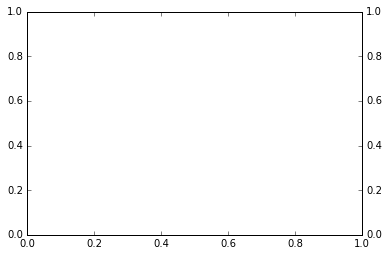

In [22]:
# Accuracy plot
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss)
ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_title('Test Accuracy: {:.2f}'.format(test_acc[-1]))

In [6]:
%%time
niter = 964
test_interval = 50
# losses will also be stored in the log
train_loss = zeros(niter)
test_acc = zeros(int(np.ceil(niter / test_interval)))
# output = zeros((niter, 8, 2))

# the main solver loop
for it in range(niter):
#     solver.net.forward()
    solver.step(1)
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    
    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
#     solver.test_nets[0].forward(start='conv1')
#     output[it] = solver.test_nets[0].blobs['ip2'].data[:8]
    
    if it % test_interval == 0:
        print 'Iteration', it, 'testing...'
        correct = 0
        correct_1 = 0
        classify_1 = 0
        num_1 = 0
        for test_it in range(151):
            test_out = solver.test_nets[0].forward()
            print test_out['prob'][:1]
            correct += sum(test_out['prob'].argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
            correct_1 += sum(np.logical_and(test_out['prob'].argmax(1)== solver.test_nets[0].blobs['label'].data, 
                             solver.test_nets[0].blobs['label'].data == np.ones(100)))
            classify_1 += sum(test_out['prob'].argmax(1) == np.ones(100))
            num_1 += sum(solver.test_nets[0].blobs['label'].data == np.ones(100, dtype=np.int))
            
        test_acc[it // test_interval] = correct / 15100.0
        correct_1 = correct_1
        num_1 = num_1


Iteration 0 testing...
[[ 0.23812878  0.76187122]]
[[ 0.25141978  0.74858022]]
[[ 0.24623427  0.75376576]]
[[ 0.2499115   0.75008851]]
[[ 0.22863993  0.7713601 ]]
[[ 0.23540573  0.76459432]]
[[ 0.2544457   0.74555433]]
[[ 0.24187724  0.75812268]]
[[ 0.24191846  0.75808156]]
[[ 0.24375363  0.75624633]]
[[ 0.23577744  0.76422256]]
[[ 0.24305959  0.75694042]]
[[ 0.24541208  0.75458789]]
[[ 0.23726609  0.76273394]]
[[ 0.24246319  0.75753683]]
[[ 0.25106889  0.74893111]]
[[ 0.22808327  0.77191669]]
[[ 0.24100056  0.75899947]]
[[ 0.23111324  0.76888674]]
[[ 0.23520339  0.76479667]]
[[ 0.23556991  0.76443011]]
[[ 0.23721808  0.76278192]]
[[ 0.242328    0.75767201]]
[[ 0.23791555  0.76208442]]
[[ 0.24965565  0.75034434]]
[[ 0.25270754  0.74729252]]
[[ 0.23778945  0.76221055]]
[[ 0.25396895  0.74603105]]
[[ 0.24877101  0.75122905]]
[[ 0.24190906  0.75809091]]
[[ 0.23820223  0.76179779]]
[[ 0.25379553  0.74620444]]
[[ 0.25500569  0.74499428]]
[[ 0.2442234   0.75577664]]
[[ 0.25328976  0.74671018

KeyboardInterrupt: 